# Modèle pre-entrainer VGG16 : classification binaire COVID / SAIN (NORMAL) par extraction de features

In [13]:
# Chargement des modules nécessaires :

import os

import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.models import Model


In [2]:
# On declare les chemins vers les données :

Image = 'Data'
        
train_data_dir = 'Data/TRAIN'
validation_data_dir = 'Data/VALIDATION'
test_data_dir = 'Data/TEST'

# Dimensions et path :
img_width, img_height = 224, 224

ImageTRAINCOVID = os.listdir(Image + '/TRAIN/COVID19')
ImageTRAINNORMAL = os.listdir(Image + '/TRAIN/NORMAL')

ImageVALIDATIONCOVID = os.listdir(Image + '/VALIDATION/COVID19')
ImageVALIDATIONNORMAL = os.listdir(Image + '/VALIDATION/NORMAL')

ImageTESTCOVID = os.listdir(Image + '/TEST/COVID19')
ImageTESTNORMAL = os.listdir(Image + '/TEST/NORMAL')

print('Il y a ' + str(len(ImageTRAINCOVID)) + ' images d\'entrainement de patient covid.') 
print('Il y a ' + str(len(ImageTRAINNORMAL)) + ' images d\'entrainement de patient non-covid.') 
print('Il y a ' + str(len(ImageVALIDATIONCOVID)) + ' images de validation de patient covid.') 
print('Il y a ' + str(len(ImageVALIDATIONNORMAL)) + ' images de validation de patient non-covid.') 
print('Il y a ' + str(len(ImageTESTCOVID)) + ' images test de patient covid.') 
print('Il y a ' + str(len(ImageTESTNORMAL)) + ' images test de patient non-covid.') 

Il y a 460 images d'entrainement de patient covid.
Il y a 1266 images d'entrainement de patient non-covid.
Il y a 116 images de validation de patient covid.
Il y a 317 images de validation de patient non-covid.
Il y a 219 images test de patient covid.
Il y a 1341 images test de patient non-covid.


TRAIN COVID


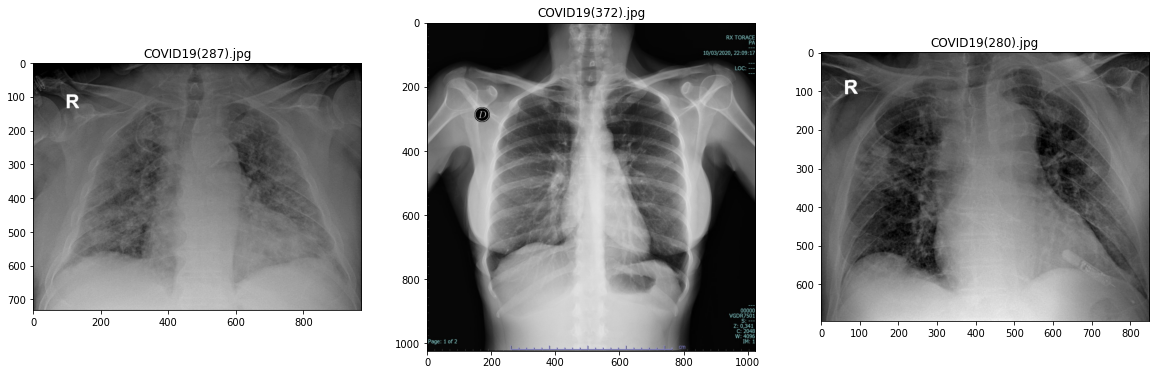

TEST COVID


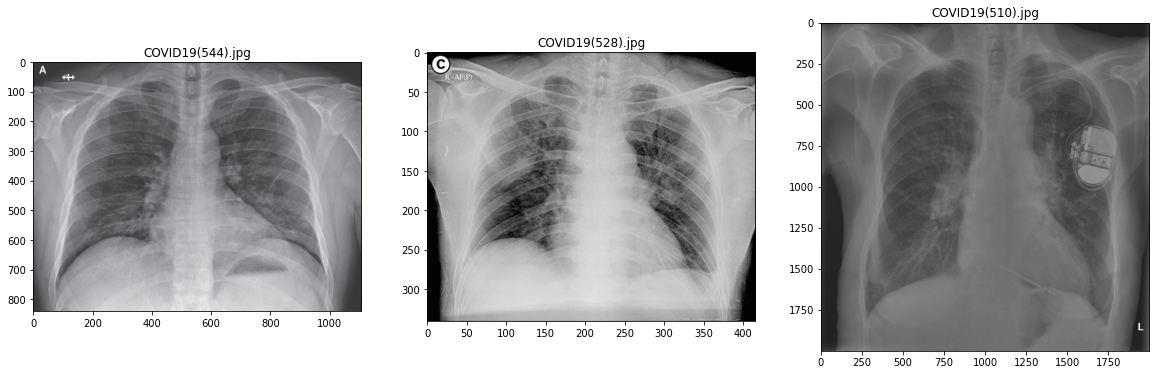

TRAIN NORMAL


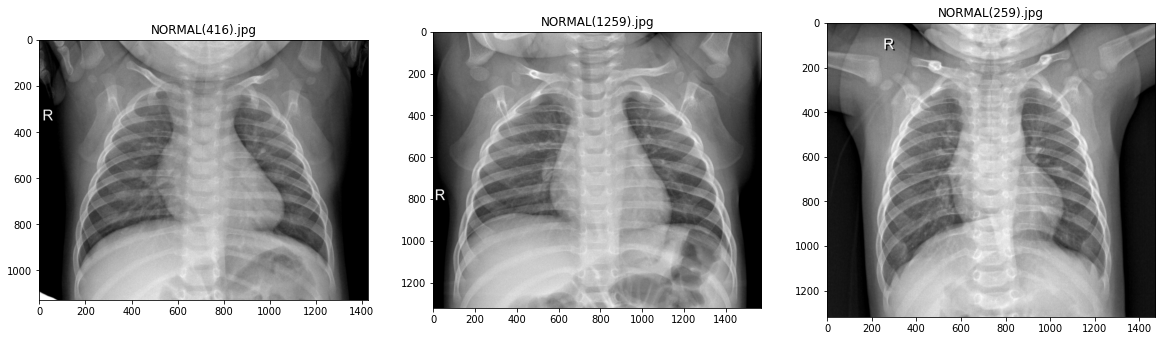

TEST NORMAL


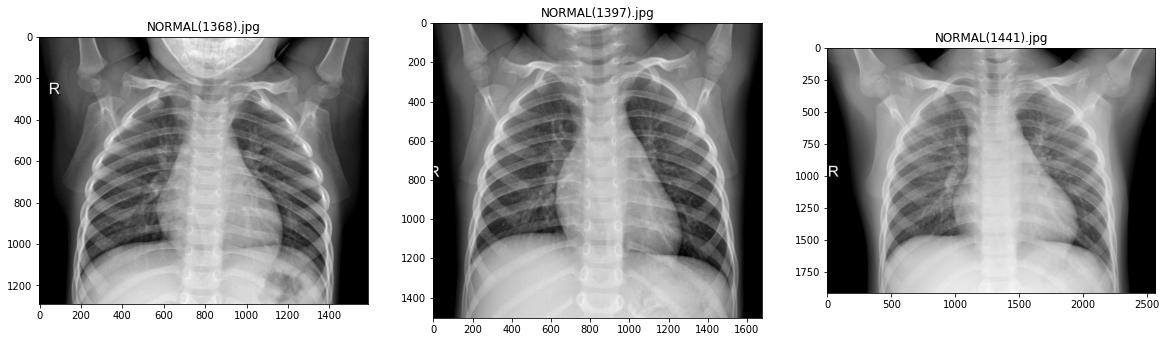

In [3]:
# Visualisation de 6 exemples en 2 lignes et 3 colonnes pour chaque classe :

# TRAIN :

print("TRAIN COVID")


# COVID  :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTRAINCOVID = random.choice(os.listdir(train_data_dir + '/COVID19'))
    plt.imshow(plt.imread(os.path.join( train_data_dir +'/COVID19',randomImageTRAINCOVID)), cmap='gray')
    plt.title(randomImageTRAINCOVID)
    
plt.show()

print("TEST COVID")
# COVID  :
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTESTCOVID = random.choice(os.listdir(validation_data_dir + '/COVID19'))
    plt.imshow(plt.imread(os.path.join( validation_data_dir +'/COVID19',randomImageTESTCOVID)), cmap='gray')
    plt.title(randomImageTESTCOVID)
    
plt.show()

print("TRAIN NORMAL")
# NORMAL :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTRAINNORMAL = random.choice(os.listdir(train_data_dir + '/NORMAL'))
    plt.imshow(plt.imread(os.path.join( train_data_dir +'/NORMAL',randomImageTRAINNORMAL)), cmap='gray')
    plt.title(randomImageTRAINNORMAL)
    
plt.show()


# TEST:

print("TEST NORMAL")

# NORMAL :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageTESTNORMAL = random.choice(os.listdir(validation_data_dir + '/NORMAL'))
    plt.imshow(plt.imread(os.path.join(validation_data_dir +'/NORMAL',randomImageTESTNORMAL)), cmap='gray')
    plt.title(randomImageTESTNORMAL)
    
plt.show()

In [4]:
# Preprocessing :
# On rescale les images :
datagen = ImageDataGenerator(rescale=1./255)

# On définit la batch size :
batch_size = 32

# On prépare les tableaux de données depuis les images :
train_generator_bottleneck = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

validation_generator_bottleneck = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None)


test_generator_bottleneck = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=True)



Found 1726 images belonging to 2 classes.
Found 433 images belonging to 2 classes.
Found 1560 images belonging to 2 classes.


In [5]:
# Chargement de VGG16 sans la partie fully-connected avec le réseau convolutif entrainé sur imagenet :

model_vgg = applications.VGG16(include_top=False, weights='imagenet')

In [6]:
# On utilse le model VGG16 pour extraire les features de nos images 
# on récupère la sortie du réseau convolutionnel :
train_features = model_vgg.predict_generator(train_generator_bottleneck, 1726 // batch_size)
validation_features = model_vgg.predict_generator(validation_generator_bottleneck, 433 // batch_size)
test_features = model_vgg.predict_generator(test_generator_bottleneck, 1560 // batch_size)

# L'opération étant longue on enregistre les features obtenues :
np.save(open('models/trainFeatures_VGG16_AllData.npy', 'wb'), train_features) # ecriture en binaire necessaire
np.save(open('models/validationFeatures_VGG16_AllData.npy', 'wb'), validation_features) # Idem
np.save(open('models/testFeatures_VGG16_AllData.npy', 'wb'), test_features) # Idem

/Users/chourouk/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [7]:
# Si l'operation a déjà été effectuée on charge les features :

train_features = np.load(open('models/trainFeatures_VGG16_AllData.npy', 'rb'))
validation_features = np.load(open('models/validationFeatures_VGG16_AllData.npy', 'rb'))
test_features = np.load(open('models/testFeatures_VGG16_AllData.npy', 'rb'))

In [8]:
# On définit les labels :

train_labels = np.array([0] * 448 + [1] * 1248)
validation_labels = np.array([0] * 116 + [1] * 300)
test_labels = np.array([0] * 219 + [1] * 1317)

# On peut maintenant tester plusieurs couches fully-connected à partir de ce modèle :

In [9]:
# Premier modèle : 
model_top1 = Sequential()
model_top1.add(Flatten(input_shape=train_features.shape[1:]))
model_top1.add(Dense(64, activation='relu'))
model_top1.add(Dropout(0.5))
model_top1.add(Dense(1, activation='sigmoid'))

# On compile :
model_top1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# On affiche :
model_top1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1605696   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,605,761
Trainable params: 1,605,761
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Second modèle :
model_top2 = Sequential()
model_top2.add(Flatten(input_shape=train_features.shape[1:]))
model_top2.add(Dense(128, activation='relu'))
model_top2.add(Dropout(0.5))
model_top2.add(Dense(1, activation='sigmoid'))

# On compile :
model_top2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# On affiche :
model_top2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 3,211,521
Trainable params: 3,211,521
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Troisieme modèle :
model_top3 = Sequential()
model_top3.add(Flatten(input_shape=train_features.shape[1:]))
model_top3.add(Dense(256, activation='relu'))
model_top3.add(Dropout(0.5))
model_top3.add(Dense(1, activation='sigmoid'))

# On compile :
model_top3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# On affiche :
model_top3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


In [14]:
# On définit les paramètres pour l'entrainement :
epochs = 100


# On définit les callbacks : 
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience = 10,restore_best_weights=True,),
]

In [15]:
# On entraine le premier modèle:

historique1 = model_top1.fit(train_features, train_labels,
        epochs=epochs, 
        callbacks = my_callbacks,
        batch_size=batch_size,
        validation_data=(validation_features, validation_labels))

Epoch 1/100
53/53 [==============================] - 3s 52ms/step - loss: 0.8751 - accuracy: 0.8414 - val_loss: 2.4452 - val_accuracy: 0.6010
Epoch 2/100
53/53 [==============================] - 1s 23ms/step - loss: 0.1332 - accuracy: 0.9599 - val_loss: 3.3164 - val_accuracy: 0.5938
Epoch 3/100
53/53 [==============================] - 2s 34ms/step - loss: 0.1066 - accuracy: 0.9734 - val_loss: 2.9428 - val_accuracy: 0.5938
Epoch 4/100
53/53 [==============================] - 2s 32ms/step - loss: 0.0936 - accuracy: 0.9748 - val_loss: 5.0859 - val_accuracy: 0.5962
Epoch 5/100
53/53 [==============================] - 1s 23ms/step - loss: 0.0783 - accuracy: 0.9805 - val_loss: 5.6740 - val_accuracy: 0.5962
Epoch 6/100
53/53 [==============================] - 2s 35ms/step - loss: 0.0717 - accuracy: 0.9813 - val_loss: 5.1377 - val_accuracy: 0.5962
Epoch 7/100
53/53 [==============================] - 2s 41ms/step - loss: 0.0599 - accuracy: 0.9842 - val_loss: 6.1071 - val_accuracy: 0.5962
Epoch 

In [16]:
n_epochs = len(historique1.history['loss'])
GenOptimale1 = n_epochs-10
print("la generation optimale est : ",GenOptimale1)
model_top1.save_weights('../memory/Weights/vgg16_lightTop_224_224_'+str(GenOptimale1)+'.h5')

la generation optimale est :  1


In [17]:
# On entraine le deuxième modèle:
historique2 = model_top2.fit(train_features, train_labels,
        epochs=epochs, 
        callbacks = my_callbacks,
        batch_size=batch_size,
        validation_data=(validation_features, validation_labels))

Epoch 1/100
53/53 [==============================] - 5s 78ms/step - loss: 1.1533 - accuracy: 0.8227 - val_loss: 3.1931 - val_accuracy: 0.5938
Epoch 2/100
53/53 [==============================] - 3s 54ms/step - loss: 0.1005 - accuracy: 0.9644 - val_loss: 3.4675 - val_accuracy: 0.5962
Epoch 3/100
53/53 [==============================] - 4s 77ms/step - loss: 0.0708 - accuracy: 0.9775 - val_loss: 4.9946 - val_accuracy: 0.6562
Epoch 4/100
53/53 [==============================] - 2s 46ms/step - loss: 0.0805 - accuracy: 0.9769 - val_loss: 4.1478 - val_accuracy: 0.5962
Epoch 5/100
53/53 [==============================] - 3s 47ms/step - loss: 0.0742 - accuracy: 0.9839 - val_loss: 4.8616 - val_accuracy: 0.5962
Epoch 6/100
53/53 [==============================] - 2s 47ms/step - loss: 0.0518 - accuracy: 0.9873 - val_loss: 5.5983 - val_accuracy: 0.5962
Epoch 7/100
53/53 [==============================] - 4s 80ms/step - loss: 0.0896 - accuracy: 0.9811 - val_loss: 5.6600 - val_accuracy: 0.5962
Epoch 

In [18]:
n_epochs = len(historique2.history['loss'])
GenOptimale2 = n_epochs-10
print("la generation optimale est : ",GenOptimale2)
model_top2.save_weights('../memory/Weights/vgg16_mediumTop_224_224_'+str(GenOptimale2)+'.h5')

la generation optimale est :  1


In [19]:
# On entraine le troisième modèle:
historique3 = model_top3.fit(train_features, train_labels,
        epochs=epochs, 
        callbacks = my_callbacks,
        batch_size=batch_size,
        validation_data=(validation_features, validation_labels))

Epoch 1/100
53/53 [==============================] - 8s 128ms/step - loss: 1.7615 - accuracy: 0.8464 - val_loss: 4.2610 - val_accuracy: 0.5962
Epoch 2/100
53/53 [==============================] - 6s 119ms/step - loss: 0.1284 - accuracy: 0.9718 - val_loss: 4.3532 - val_accuracy: 0.6154
Epoch 3/100
53/53 [==============================] - 7s 125ms/step - loss: 0.0686 - accuracy: 0.9832 - val_loss: 4.2249 - val_accuracy: 0.5962
Epoch 4/100
53/53 [==============================] - 5s 98ms/step - loss: 0.0991 - accuracy: 0.9808 - val_loss: 4.9010 - val_accuracy: 0.5962
Epoch 5/100
53/53 [==============================] - 6s 115ms/step - loss: 0.1017 - accuracy: 0.9791 - val_loss: 4.7561 - val_accuracy: 0.5938
Epoch 6/100
53/53 [==============================] - 6s 110ms/step - loss: 0.0853 - accuracy: 0.9737 - val_loss: 6.1939 - val_accuracy: 0.5986
Epoch 7/100
53/53 [==============================] - 6s 109ms/step - loss: 0.0426 - accuracy: 0.9898 - val_loss: 4.7027 - val_accuracy: 0.5841


In [20]:
n_epochs = len(historique3.history['loss'])
GenOptimale3 = n_epochs-10
print("la generation optimale est : ",GenOptimale3)
model_top3.save_weights('../memory/Weights/vgg16_heavyTop_224_224_'+str(GenOptimale3)+'.h5')

la generation optimale est :  3


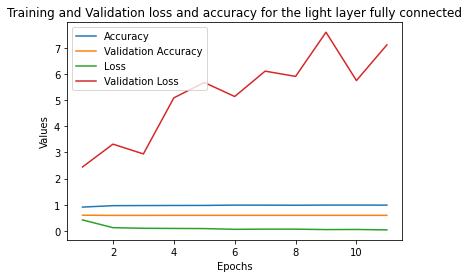

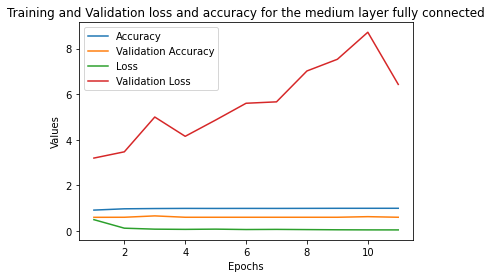

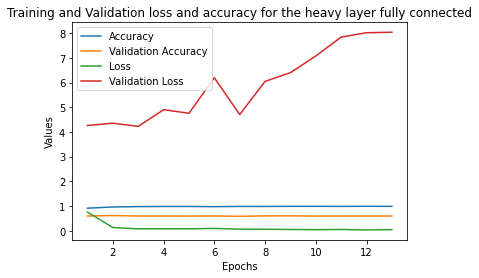

In [21]:
# Visualisation de l'entrainement :

epochs = range(1,12)
plt.plot(epochs, historique1.history['accuracy'], label='Accuracy')
plt.plot(epochs, historique1.history['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs, historique1.history['loss'], label='Loss')
plt.plot(epochs, historique1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss and accuracy for the light layer fully connected')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()


epochs = range(1,12)
plt.plot(epochs, historique2.history['accuracy'], label='Accuracy')
plt.plot(epochs, historique2.history['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs, historique2.history['loss'], label='Loss')
plt.plot(epochs, historique2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss and accuracy for the medium layer fully connected')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()


epochs = range(1,14)
plt.plot(epochs, historique3.history['accuracy'], label='Accuracy')
plt.plot(epochs, historique3.history['val_accuracy'], label='Validation Accuracy')
plt.plot(epochs, historique3.history['loss'], label='Loss')
plt.plot(epochs, historique3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation loss and accuracy for the heavy layer fully connected')
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.show()


In [22]:
# On évalue :

# Avec les données de validation :
eval1 = model_top1.evaluate(validation_features, validation_labels,verbose=2)
eval2 = model_top2.evaluate(validation_features, validation_labels,verbose=2)
eval3 = model_top3.evaluate(validation_features, validation_labels,verbose=2)

# Avec les données de test :
evaltest1 = model_top1.evaluate(test_features, test_labels,verbose=2)
evaltest2 = model_top2.evaluate(test_features, test_labels,verbose=2)
evaltest3 = model_top3.evaluate(test_features, test_labels,verbose=2)

# on visualise, on test , on affiche :

13/13 - 0s - loss: 2.4452 - accuracy: 0.6010
13/13 - 0s - loss: 3.1931 - accuracy: 0.5938
13/13 - 0s - loss: 4.2249 - accuracy: 0.5962
48/48 - 0s - loss: 1.5419 - accuracy: 0.7630
48/48 - 0s - loss: 2.0198 - accuracy: 0.7565
48/48 - 1s - loss: 2.7014 - accuracy: 0.7611


## Enregistrements (facultatif)

In [23]:
# On enregistre les historiques des modèles:

np.save('../memory/history/historique_chourouk_vgg16_224_224_light_'+str(GenOptimale1)+'.npy',historique1.history)
np.save('../memory/history/historique_chourouk_vgg16_224_224_medium_'+str(GenOptimale2)+'.npy',historique2.history)
np.save('../memory/history/historique_chourouk_vgg16_224_224_heavy_'+str(GenOptimale3)+'.npy',historique3.history)